In [19]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [20]:
df = pd.read_csv('webtraffic_time.csv')

In [21]:
datetime = pd.DataFrame(pd.DatetimeIndex(start = '2017-03-01', freq = 'H', end = '2019-01-30'))

In [22]:
hourly_traffic = pd.concat([df, datetime], axis =1)

In [23]:
hourly_traffic.drop(hourly_traffic.index[-1], inplace=True)
hourly_traffic = hourly_traffic.drop(columns = ['Hour Index'])

In [24]:
hourly_traffic.columns = (['Users', 'Datetime'])

In [25]:
hourly_traffic = hourly_traffic.set_index('Datetime')

In [26]:
hourly_traffic.Users = pd.to_numeric(hourly_traffic['Users'])

In [27]:
df = pd.read_csv('webtraffic_time.csv')
datetime = pd.DataFrame(pd.date_range(start = '2017-03-01', freq = 'H', end = '2019-01-30'))
hourly_traffic = pd.concat([df, datetime], axis =1)
hourly_traffic.drop(hourly_traffic.index[-1], inplace=True)
hourly_traffic = hourly_traffic.drop(columns = ['Hour Index'])
hourly_traffic.columns = (['Users', 'Datetime'])
hourly_traffic = hourly_traffic.set_index('Datetime')
hourly_traffic.Users = pd.to_numeric(hourly_traffic['Users'])

In [28]:
hourly_traffic.max()

Users    724
dtype: int64

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [30]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df = df.copy()
    df['date'] = df.index
    df['weekday'] = df['date'].dt.day_name()
    df['weekday'] = pd.Categorical(df['weekday'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
    df['users'] = df.Users
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['weekday','users','hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    return X

In [31]:
full_dates = create_features(hourly_traffic)

In [32]:
full_dates.head()

,weekday,users,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,,
2017-03-01 00:00:00,Wednesday,0,0,2,1,3,2017,60,1,9
2017-03-01 01:00:00,Wednesday,0,1,2,1,3,2017,60,1,9
2017-03-01 02:00:00,Wednesday,0,2,2,1,3,2017,60,1,9
2017-03-01 03:00:00,Wednesday,0,3,2,1,3,2017,60,1,9
2017-03-01 04:00:00,Wednesday,0,4,2,1,3,2017,60,1,9


In [36]:
list(full_dates['2019']['users'].index)

[Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-01-01 01:00:00'),
 Timestamp('2019-01-01 02:00:00'),
 Timestamp('2019-01-01 03:00:00'),
 Timestamp('2019-01-01 04:00:00'),
 Timestamp('2019-01-01 05:00:00'),
 Timestamp('2019-01-01 06:00:00'),
 Timestamp('2019-01-01 07:00:00'),
 Timestamp('2019-01-01 08:00:00'),
 Timestamp('2019-01-01 09:00:00'),
 Timestamp('2019-01-01 10:00:00'),
 Timestamp('2019-01-01 11:00:00'),
 Timestamp('2019-01-01 12:00:00'),
 Timestamp('2019-01-01 13:00:00'),
 Timestamp('2019-01-01 14:00:00'),
 Timestamp('2019-01-01 15:00:00'),
 Timestamp('2019-01-01 16:00:00'),
 Timestamp('2019-01-01 17:00:00'),
 Timestamp('2019-01-01 18:00:00'),
 Timestamp('2019-01-01 19:00:00'),
 Timestamp('2019-01-01 20:00:00'),
 Timestamp('2019-01-01 21:00:00'),
 Timestamp('2019-01-01 22:00:00'),
 Timestamp('2019-01-01 23:00:00'),
 Timestamp('2019-01-02 00:00:00'),
 Timestamp('2019-01-02 01:00:00'),
 Timestamp('2019-01-02 02:00:00'),
 Timestamp('2019-01-02 03:00:00'),
 Timestamp('2019-01-

In [33]:
full_dates.dtypes

weekday       category
users            int64
hour             int64
dayofweek        int64
quarter          int64
month            int64
year             int64
dayofyear        int64
dayofmonth       int64
weekofyear       int64
dtype: object

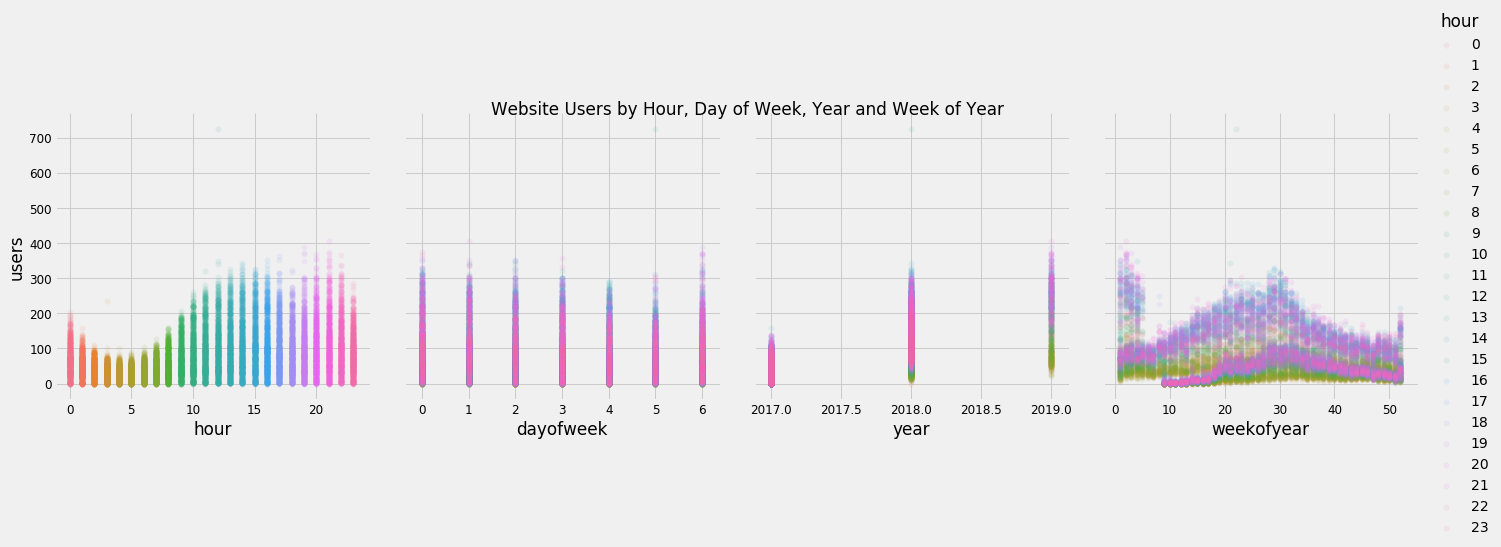

In [34]:
sns.pairplot(full_dates.dropna(),
             hue='hour',
             x_vars=['hour','dayofweek','year','weekofyear'],
             y_vars=['users'],
             height=5,
             plot_kws={'alpha':0.1, 'linewidth':0}
            )
plt.suptitle('Website Users by Hour, Day of Week, Year and Week of Year')
plt.show()

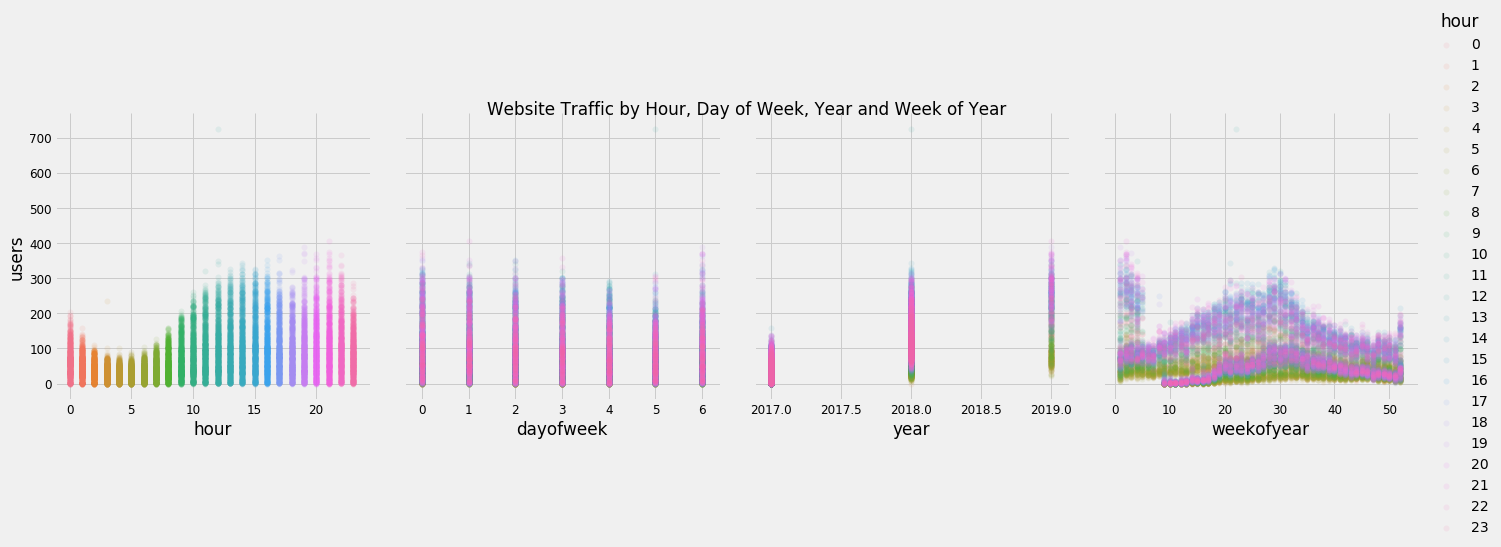

In [17]:
sns.pairplot(full_dates.dropna(),
             hue='hour',
             x_vars=['hour','dayofweek','year','weekofyear'],
             y_vars='users',
             height=5,
             plot_kws={'alpha':0.1, 'linewidth':0}
            )
plt.suptitle('Website Traffic by Hour, Day of Week, Year and Week of Year')
plt.show()

In [76]:
list(full_dates.groupby('hour').users.sum().index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

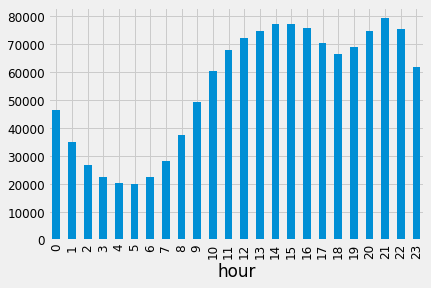

In [19]:
full_dates.groupby('hour').users.sum().plot(kind = 'bar', sort_columns = True)

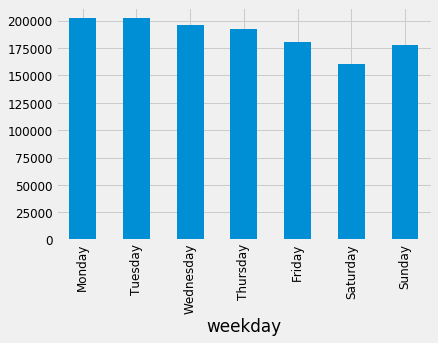

In [20]:
full_dates.groupby('weekday').users.sum().plot(kind = 'bar', sort_columns = True)

In [168]:
# full_dates['users']
# full_dates.head()
list(full_dates['2019-01-01':]['users'])

# df[(df['date'] > '2013-01-01') & (df['date'] < '2013-02-01')]

[58,
 36,
 37,
 35,
 26,
 21,
 26,
 25,
 38,
 54,
 93,
 99,
 131,
 140,
 161,
 195,
 181,
 179,
 178,
 209,
 179,
 219,
 223,
 162,
 108,
 93,
 63,
 52,
 46,
 68,
 60,
 58,
 77,
 130,
 150,
 229,
 341,
 260,
 250,
 313,
 351,
 264,
 249,
 302,
 328,
 350,
 315,
 245,
 175,
 118,
 87,
 58,
 75,
 63,
 53,
 88,
 105,
 188,
 220,
 253,
 282,
 301,
 293,
 300,
 301,
 293,
 253,
 285,
 296,
 332,
 298,
 244,
 169,
 124,
 89,
 80,
 55,
 69,
 74,
 91,
 132,
 173,
 248,
 259,
 256,
 269,
 270,
 292,
 264,
 256,
 221,
 231,
 246,
 266,
 256,
 233,
 169,
 157,
 77,
 73,
 65,
 55,
 67,
 67,
 79,
 190,
 194,
 211,
 229,
 225,
 261,
 259,
 286,
 275,
 275,
 288,
 273,
 297,
 292,
 201,
 192,
 125,
 97,
 86,
 82,
 68,
 59,
 77,
 101,
 150,
 161,
 205,
 235,
 280,
 322,
 315,
 338,
 314,
 317,
 389,
 303,
 352,
 299,
 268,
 205,
 127,
 110,
 72,
 67,
 53,
 92,
 88,
 121,
 149,
 190,
 258,
 263,
 281,
 312,
 286,
 290,
 352,
 276,
 350,
 359,
 376,
 366,
 286,
 184,
 108,
 99,
 102,
 101,
 60,
 74,
 95

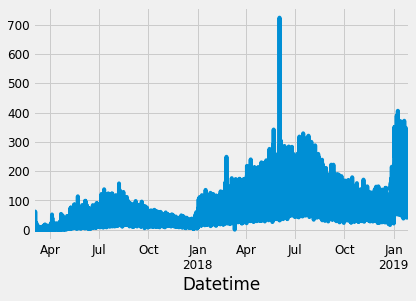

In [21]:
full_dates['users'].plot()

## Train/Test Split

In [22]:
split_date = '01-Sept-2018'
traffic_train = full_dates.loc[full_dates.index <= split_date].copy()
traffic_test = full_dates.loc[full_dates.index > split_date].copy()

## Format Data using Prophet Model

In [23]:
# Format data for prophet model using ds and y
traffic_train.reset_index().rename(columns={'Datetime':'ds', 'users':'y'}).head()

,ds,weekday,y,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,2017-03-01 00:00:00,Wednesday,0,0,2,1,3,2017,60,1,9
1,2017-03-01 01:00:00,Wednesday,0,1,2,1,3,2017,60,1,9
2,2017-03-01 02:00:00,Wednesday,0,2,2,1,3,2017,60,1,9
3,2017-03-01 03:00:00,Wednesday,0,3,2,1,3,2017,60,1,9
4,2017-03-01 04:00:00,Wednesday,0,4,2,1,3,2017,60,1,9


In [24]:
#Set up and train model
model = Prophet()
model.fit(traffic_train.reset_index().rename(columns={'Datetime':'ds', 'users':'y'}))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [38]:
# Predict on training set with model
traffic_test_forecast = model.predict(df=traffic_test.reset_index().rename(columns={'Datetime':'ds'}))

In [147]:
# traffic_test_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(100)
jan_forecast = traffic_test_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][(traffic_test_forecast.ds > '2019-01-01')]
# df[(df['date'] > '2013-01-01') & (df['date'] < '2013-02-01')]



In [180]:
jan_forecast.join(pd.DataFrame(full_dates['2019-01-01':]['users']), on='ds').to_csv('jan_forecast.csv')

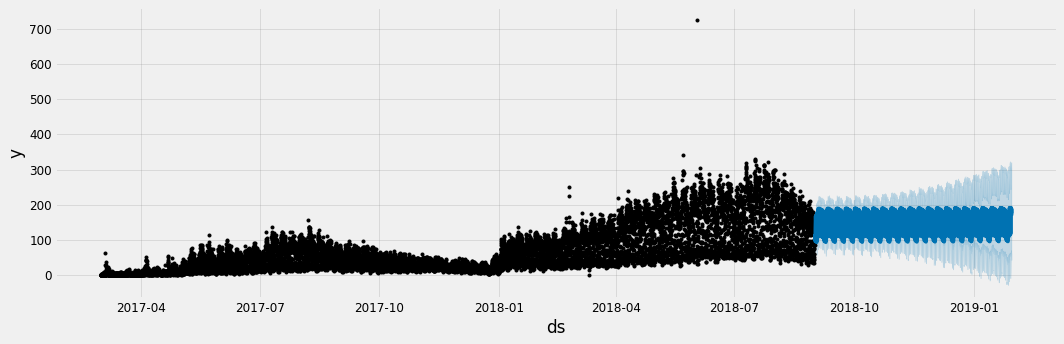

In [144]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(traffic_test_forecast, ax=ax)

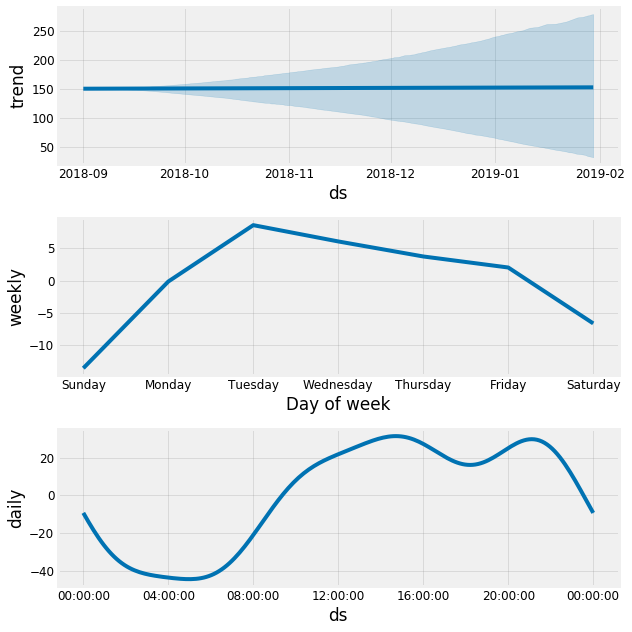

In [40]:
# Plot the components
fig = model.plot_components(traffic_test_forecast)

In [41]:
traffic_test.head()

,weekday,users,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,,
2018-09-01 01:00:00,Saturday,60,1,5,3,9,2018,244,1,35
2018-09-01 02:00:00,Saturday,51,2,5,3,9,2018,244,1,35
2018-09-01 03:00:00,Saturday,41,3,5,3,9,2018,244,1,35
2018-09-01 04:00:00,Saturday,34,4,5,3,9,2018,244,1,35
2018-09-01 05:00:00,Saturday,31,5,5,3,9,2018,244,1,35


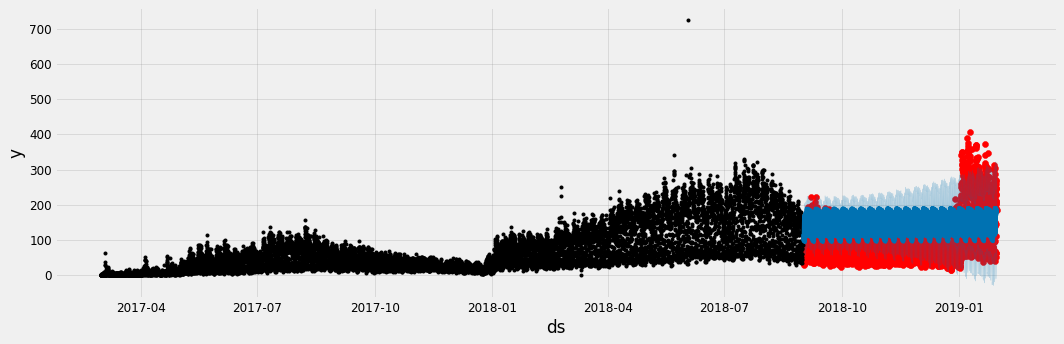

In [42]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(traffic_test.index, traffic_test['users'], color='r')
fig = model.plot(traffic_test_forecast, ax=ax)

### Look at first month of predictions

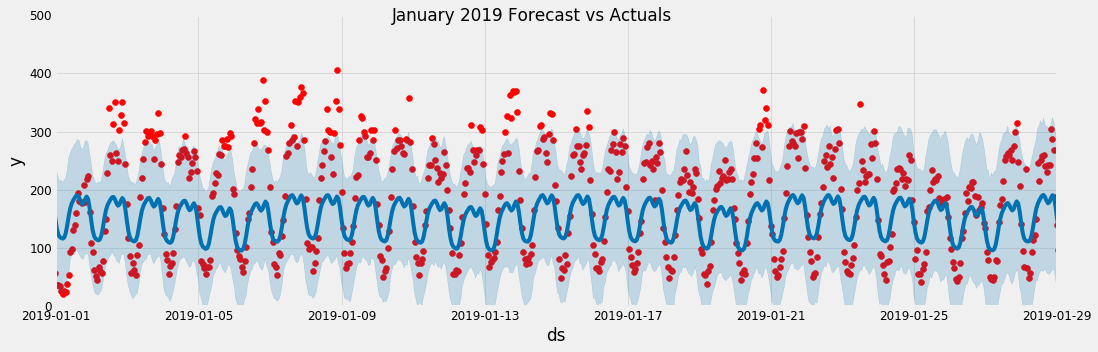

In [43]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(traffic_test.index, traffic_test['users'], color='r')
fig = model.plot(traffic_test_forecast, ax=ax)
ax.set_xbound(lower='01-01-2019', upper='01-29-2019')
ax.set_ylim(0, 500)
plot = plt.suptitle('January 2019 Forecast vs Actuals')

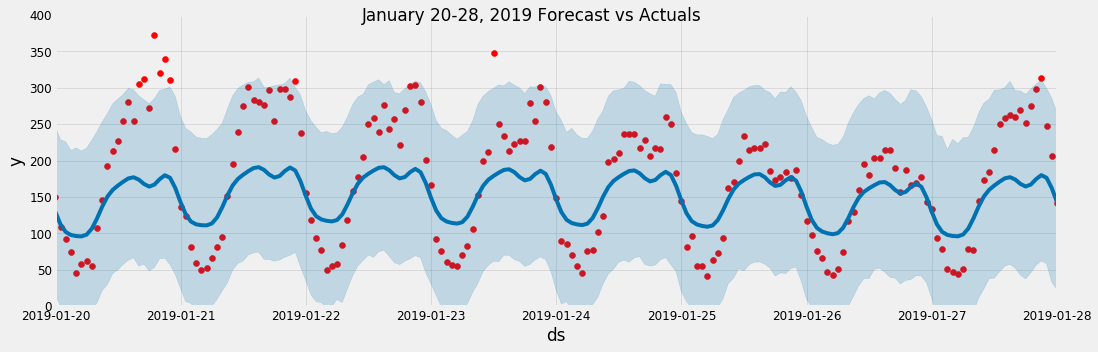

In [44]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(traffic_test.index, traffic_test['users'], color='r')
fig = model.plot(traffic_test_forecast, ax=ax)
ax.set_xbound(lower='01-20-2019', upper='01-28-2019')
ax.set_ylim(0, 400)
plot = plt.suptitle('January 20-28, 2019 Forecast vs Actuals')

In [52]:
m = Prophet()
m.fit(full_dates.reset_index().rename(columns={'Datetime':'ds', 'users':'y'}))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [55]:
future = m.make_future_dataframe(periods=240, freq="1h")
future.tail()

,ds
17035,2019-02-08 19:00:00
17036,2019-02-08 20:00:00
17037,2019-02-08 21:00:00
17038,2019-02-08 22:00:00
17039,2019-02-08 23:00:00


In [169]:
future_forecast = m.predict(future)
future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
17035,2019-02-08 19:00:00,165.386791,123.218737,208.694960
17036,2019-02-08 20:00:00,172.754069,130.822122,212.899815
17037,2019-02-08 21:00:00,177.206295,135.133220,216.410049
17038,2019-02-08 22:00:00,171.372042,129.439906,210.800068
17039,2019-02-08 23:00:00,154.072307,110.664520,196.495762


In [178]:
# feb_forecast = future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][(future_forecast.ds > '2019-01-22')]

feb_forecast.join(pd.DataFrame(full_dates['2019-01-22':]['users']), on='ds').to_csv('feb_forecast.csv')


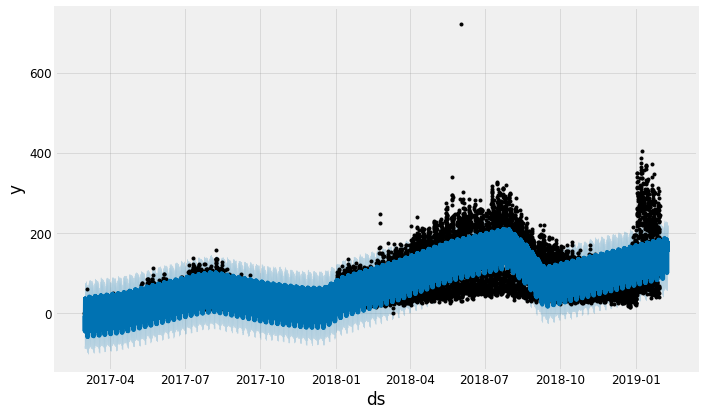

In [57]:
fig1 = m.plot(forecast)

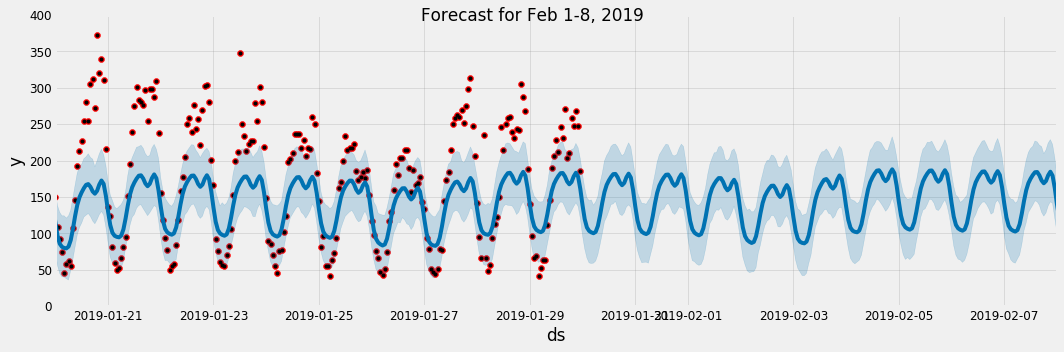

In [60]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(traffic_test.index, traffic_test['users'], color='r')
fig = m.plot(forecast, ax=ax)
ax.set_xbound(lower='01-20-2019', upper='02-08-2019')
ax.set_ylim(0, 400)
plot = plt.suptitle('Forecast for Feb 1-8, 2019')

In [200]:
mean_squared_error(y_true=traffic_test['users'],
                   y_pred=traffic_test_forecast['yhat'])

4649.192842502314

In [202]:
mean_absolute_error(y_true=traffic_test['users'],
                   y_pred=traffic_test_forecast['yhat'])

62.718629611299384

In [203]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=traffic_test['users'],
                   y_pred=traffic_test_forecast['yhat'])

85.64999050496395

In [205]:
np.sqrt(mean_squared_error(y_true=traffic_test['users'],
                   y_pred=traffic_test_forecast['yhat']))

68.18498986215599

## custom colorscale

In [132]:
import colorlover as cl
bupu = cl.scales['9']['seq']['PuRd']
ryb_nums = cl.to_numeric(bupu)
rgb = 'rgb'
rgb_nums = [rgb+str(num) for num in ryb_nums]
percents = [0,.1,.3,.4,.5,.6,.7,.9,1.0]
custom_colorscale = list(map(list,list(zip(percents,rgb_nums))))

In [114]:
[0.1, 'rgb(20, 20, 20)'],
[0.2, 'rgb(20, 20, 20)'],

[('rgb', (247.0, 244.0, 249.0)),
 ('rgb', (231.0, 225.0, 239.0)),
 ('rgb', (212.0, 185.0, 218.0)),
 ('rgb', (201.0, 148.0, 199.0)),
 ('rgb', (223.0, 101.0, 176.0)),
 ('rgb', (231.0, 41.0, 138.0)),
 ('rgb', (206.0, 18.0, 86.0)),
 ('rgb', (152.0, 0.0, 67.0)),
 ('rgb', (103.0, 0.0, 31.0))]

In [133]:
custom_colorscale
# [[0, 'green'], [0.5, 'red'], [1.0, 'rgb(0, 0, 255)']]

[[0, 'rgb(247.0, 244.0, 249.0)'],
 [0.1, 'rgb(231.0, 225.0, 239.0)'],
 [0.3, 'rgb(212.0, 185.0, 218.0)'],
 [0.4, 'rgb(201.0, 148.0, 199.0)'],
 [0.5, 'rgb(223.0, 101.0, 176.0)'],
 [0.6, 'rgb(231.0, 41.0, 138.0)'],
 [0.7, 'rgb(206.0, 18.0, 86.0)'],
 [0.9, 'rgb(152.0, 0.0, 67.0)'],
 [1, 'rgb(103.0, 0.0, 31.0)']]

In [5]:
[[0,'#ffa600'],
[0.14, '#2f4b7c'],
[0.28, '#ff7c43'],
[0.42, '#f95d6a'],
[0.57, '#a05195'],
[0.70, '#665191'],
[0.84, '#2f4b7c'],
[1.0, '#003f5c']]

[[0, '#003f5c'],
 [0.14, '#2f4b7c'],
 [0.28, '#665191'],
 [0.42, '#a05195'],
 [0.57, '#d45087'],
 [0.7, '#f95d6a'],
 [0.84, '#ff7c43'],
 [1.0, '#ffa600']]

In [ ]:
[[0,'#003f5c'],
[0.2, '#444e86'],
[0.4, '#955196'],
[0.6, '#dd5182'],
[0.8, '#ff6e54'],
[1.0, '#ffa600']]